In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

In [4]:
mood_df = pd.read_csv('~/qs/mood/data/Mood Form (Responses) - Mood Form.csv')

# loading the csv file

In [5]:
# https://qxmd.com/calculate/calculator_146/hamilton-depression-rating-scale-ham-d-or-hdrs
# 0-4 scale of Absent, Mild, Moderate, Severe, Incapacitating
# General Mood and Pain scored from 0-10
# all self reported (by me)

mood_df

,Timestamp,Mood,Self-Image,Pain,Energy,Concentration,Clearheaded,Productiveness,Tired,Sick,...,Notes,Date,Shower,Brush teeth,Floss,Shaved/Trimmed,Haircut,Trimmed Nails,Vitamins,Weight
0,12/21/2019 4:31:17,8,8,1,8,7,7,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/21/2019 19:25:00,7,8,1,7,7,7,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/22/2019 15:55:23,7,8,0,7,7,7,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/23/2019 5:48:11,7,8,1,7,7,7,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/23/2019 19:23:05,6,8,1,7,7,7,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,12/27/2020 23:27:59,7,9,0,7,7,7,5,0,0,...,NaN,12/27/2020,Yes,Yes,No,Neither,No,Yes,Yes,162.4
368,12/28/2020 19:11:28,7,9,0,7,7,7,5,1,0,...,NaN,12/28/2020,Yes,Yes,No,Neither,No,No,Yes,162.2
369,12/29/2020 23:59:59,7,9,0,7,7,7,5,1,0,...,NaN,12/29/2020,No,No,No,Neither,No,No,No,NaN
370,12/30/2020 18:57:42,7,9,1,7,7,7,5,1,0,...,NaN,12/30/2020,Yes,Yes,No,Neither,No,No,Yes,165.2


In [6]:
mood_df.shape

(372, 40)

In [7]:
mood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  372 non-null    object 
 1   Mood                       372 non-null    int64  
 2   Self-Image                 372 non-null    int64  
 3   Pain                       372 non-null    int64  
 4   Energy                     372 non-null    int64  
 5   Concentration              372 non-null    int64  
 6   Clearheaded                372 non-null    int64  
 7   Productiveness             372 non-null    int64  
 8   Tired                      372 non-null    int64  
 9   Sick                       372 non-null    int64  
 10  Anxiousness                372 non-null    int64  
 11  Depressed                  372 non-null    int64  
 12  Suicidal                   372 non-null    int64  
 13  Self-Harm                  372 non-null    int64  

In [8]:
mood_df.columns

Index(['Timestamp', 'Mood', 'Self-Image', 'Pain', 'Energy', 'Concentration',
       'Clearheaded', 'Productiveness', 'Tired', 'Sick', 'Anxiousness',
       'Depressed', 'Suicidal', 'Self-Harm', 'Thoughts of Death',
       'Repetitive Thoughts', 'Thoughts of Worthlessness',
       'Thoughts of Hopelessness', 'Brain Sludge', 'Sluggish', 'Restless',
       'Existential Crisis', 'Loss of Interest', 'Self Isolation', 'Paranoia',
       'Elevated', 'Irritable', 'Anger', 'Loneliness', 'Libido', 'Notes',
       'Date', 'Shower', 'Brush teeth', 'Floss', 'Shaved/Trimmed', 'Haircut',
       'Trimmed Nails', 'Vitamins', 'Weight'],
      dtype='object')

In [1]:
# from IPython.display import display
# with pd.option_context('display.max_rows', 400, 'display.max_columns', 50):
#     display(mood_df)

**CLEANING DATA**

In [9]:
mood_df['Date'] = pd.to_datetime(mood_df["Date"])
mood_df['Date']

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
367   2020-12-27
368   2020-12-28
369   2020-12-29
370   2020-12-30
371   2020-12-31
Name: Date, Length: 372, dtype: datetime64[ns]

In [10]:
mood_df['Year'] = pd.DatetimeIndex(mood_df.Date).year
mood_df['Month'] = pd.DatetimeIndex(mood_df.Date).month
mood_df['Day'] = pd.DatetimeIndex(mood_df.Date).day
mood_df['Weekday'] = pd.DatetimeIndex(mood_df.Date).weekday
mood_df['Week'] = mood_df.Date.apply(lambda x: x.week)
#https://stackoverflow.com/questions/31181295/converting-a-pandas-date-to-week-number for week of year info

In [11]:
mood_df

,Timestamp,Mood,Self-Image,Pain,Energy,Concentration,Clearheaded,Productiveness,Tired,Sick,...,Shaved/Trimmed,Haircut,Trimmed Nails,Vitamins,Weight,Year,Month,Day,Weekday,Week
0,12/21/2019 4:31:17,8,8,1,8,7,7,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/21/2019 19:25:00,7,8,1,7,7,7,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/22/2019 15:55:23,7,8,0,7,7,7,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/23/2019 5:48:11,7,8,1,7,7,7,3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/23/2019 19:23:05,6,8,1,7,7,7,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,12/27/2020 23:27:59,7,9,0,7,7,7,5,0,0,...,Neither,No,Yes,Yes,162.4,2020.0,12.0,27.0,6.0,52.0
368,12/28/2020 19:11:28,7,9,0,7,7,7,5,1,0,...,Neither,No,No,Yes,162.2,2020.0,12.0,28.0,0.0,53.0
369,12/29/2020 23:59:59,7,9,0,7,7,7,5,1,0,...,Neither,No,No,No,NaN,2020.0,12.0,29.0,1.0,53.0
370,12/30/2020 18:57:42,7,9,1,7,7,7,5,1,0,...,Neither,No,No,Yes,165.2,2020.0,12.0,30.0,2.0,53.0


In [12]:
#filling the NaN's with the previous day's weight
mood_df['Weight'] = mood_df['Weight'].fillna(method='ffill')
from IPython.display import display
with pd.option_context('display.max_rows', 400):
    display(mood_df['Weight'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11     157.0
12     159.4
13     160.4
14     158.0
15     159.4
16     158.2
17     158.0
18     157.2
19     157.6
20     158.8
21     157.6
22     157.6
23     157.6
24     159.0
25     159.0
26     157.6
27     158.8
28     158.6
29     157.2
30     157.2
31     158.2
32     158.6
33     159.0
34     158.8
35     158.8
36     159.2
37     159.6
38     157.2
39     157.2
40     157.2
41     157.2
42     160.0
43     159.2
44     157.2
45     158.8
46     161.0
47     161.0
48     161.2
49     161.2
50     158.2
51     158.2
52     158.0
53     160.0
54     159.6
55     161.2
56     160.2
57     161.2
58     161.2
59     161.2
60     161.2
61     160.2
62     160.2
63     160.2
64     160.2
65     160.4
66     160.4
67     161.4
68     161.4
69     159.4
70     159.8
71     159.8
72     161.8
73     161.4
74     161.4
75     161.0
76     159.8

In [13]:
mood_df.columns

Index(['Timestamp', 'Mood', 'Self-Image', 'Pain', 'Energy', 'Concentration',
       'Clearheaded', 'Productiveness', 'Tired', 'Sick', 'Anxiousness',
       'Depressed', 'Suicidal', 'Self-Harm', 'Thoughts of Death',
       'Repetitive Thoughts', 'Thoughts of Worthlessness',
       'Thoughts of Hopelessness', 'Brain Sludge', 'Sluggish', 'Restless',
       'Existential Crisis', 'Loss of Interest', 'Self Isolation', 'Paranoia',
       'Elevated', 'Irritable', 'Anger', 'Loneliness', 'Libido', 'Notes',
       'Date', 'Shower', 'Brush teeth', 'Floss', 'Shaved/Trimmed', 'Haircut',
       'Trimmed Nails', 'Vitamins', 'Weight', 'Year', 'Month', 'Day',
       'Weekday', 'Week'],
      dtype='object')

In [14]:
replace = 'Shower'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [15]:
replace = 'Brush teeth'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [16]:
replace = 'Floss'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [17]:
replace = 'Shaved/Trimmed'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Shaved', 2)
    mood_df[replace]= mood_df[replace].replace('Trimmed', 1)
    mood_df[replace]= mood_df[replace].replace('Neither', 0)

In [18]:
replace = 'Haircut'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [19]:
replace = 'Trimmed Nails'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [20]:
replace = 'Vitamins'
for row in mood_df[replace]:
    mood_df[replace]= mood_df[replace].replace('Yes', 1)
    mood_df[replace]= mood_df[replace].replace('No', 0)

In [21]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 50):
    display(mood_df.describe())

,Mood,Self-Image,Pain,Energy,Concentration,Clearheaded,Productiveness,Tired,Sick,Anxiousness,Depressed,Suicidal,Self-Harm,Thoughts of Death,Repetitive Thoughts,Thoughts of Worthlessness,Thoughts of Hopelessness,Brain Sludge,Sluggish,Restless,Existential Crisis,Loss of Interest,Self Isolation,Paranoia,Elevated,Irritable,Anger,Loneliness,Libido,Shower,Brush teeth,Floss,Shaved/Trimmed,Haircut,Trimmed Nails,Vitamins,Weight,Year,Month,Day,Weekday,Week
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.00000,372.0,372.000000,372.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,7.059140,8.806452,0.494624,7.018817,7.013441,7.024194,4.755376,0.454301,0.037634,0.013441,0.008065,0.002688,0.002688,0.021505,0.166667,0.013441,0.010753,0.040323,0.018817,0.137097,0.005376,0.034946,0.008065,0.002688,0.016129,0.02957,0.0,0.510753,2.008065,0.808864,0.875346,0.221607,0.080332,0.013850,0.091413,0.875346,161.038227,2019.994475,6.574586,15.792818,2.977901,26.914365
std,0.466388,0.415549,0.603202,0.225517,0.171664,0.170478,1.109551,0.540099,0.190567,0.136700,0.089560,0.051848,0.051848,0.145257,0.387356,0.115308,0.103275,0.210218,0.154608,0.381542,0.073225,0.198007,0.115810,0.051848,0.126141,0.24722,0.0,0.584980,0.089560,0.393741,0.330784,0.415904,0.336115,0.117032,0.288595,0.330784,2.005487,0.074226,3.486613,8.874855,2.001262,15.272805
min,5.000000,7.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.800000,2019.000000,1.000000,1.000000,0.000000,1.000000
25%,7.000000,9.000000,0.000000,7.000000,7.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,159.600000,2020.000000,4.000000,8.000000,1.000000,14.000000
50%,7.000000,9.000000,0.000000,7.000000,7.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,161.200000,2020.000000,7.000000,16.000000,3.000000,27.000000
75%,7.000000,9.000000,1.000000,7.000000,7.000000,7.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,162.400000,2020.000000,10.000000,23.000000,5.000000,40.000000
max,8.000000,10.000000,3.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.00000,0.0,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,166.800000,2020.000000,12.000000,31.000000,6.000000,53.000000


In [22]:
series = 'Weight'
days_had_thing = np.count_nonzero(mood_df[series][11:])
# it'll count NaN values too without that [11:] addition
# need to find way to ignore NaN's automatically instead of chopping them off manually.
days_had_thing

361

In [23]:
days_had_thing / len(mood_df[series])
# percent of days of year experienced thing

0.9704301075268817

In [24]:
mood_df[series].diff(7).mean()
# The average difference between one day and the next in a Series of data
# i.e. average difference in my weight every day is about a 1/10th of a pound

0.0926553672316383

In [25]:
mood_df[series].diff().max()
# max difference between one day and the next

3.8000000000000114

In [26]:
# *************************************
# Exporting pandas dataframe to new csv
# mood_df.to_csv('~/qs/mood/data/mood_df.csv')

**STATISTICS/CORRELATIONS**

In [152]:
from scipy.stats import pearsonr
import numpy as np
rho = mood_df.corr().round(3)
pvalues = mood_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pvalues.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
pvalues_table = rho.astype(str) + p

with pd.option_context('display.max_rows', 50, 'display.max_columns', 50):
    display(pvalues_table)

# No hypothesis per se, mood vs pain/tired/whatever was the most important. 
# There is just an n = 1, (me), how does that effect the statistics?
# need to control for the family-wise error rate (FWER) and the false discovery rate (FDR)
# Q values (adjusted p-value after correcting for FWER and FDR)
# make histogram/ chart to show p/q-values
# make chart like this for effect sizes i.e. bonferonni

/home/mcwaage1/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Mood,Self-Image,Pain,Energy,Concentration,Clearheaded,Productiveness,Tired,Sick,Anxiousness,Depressed,Suicidal,Self-Harm,Thoughts of Death,Repetitive Thoughts,Thoughts of Worthlessness,Thoughts of Hopelessness,Brain Sludge,Sluggish,Restless,Existential Crisis,Loss of Interest,Self Isolation,Paranoia,Elevated,Irritable,Anger,Loneliness,Libido,Shower,Brush teeth,Floss,Shaved/Trimmed,Haircut,Trimmed Nails,Vitamins,Weight,Year,Month,Day,Weekday,Week
Mood,1.0***,0.337***,-0.143**,0.451***,0.36***,0.355***,0.325***,-0.235***,0.066,-0.055,-0.334***,-0.23***,-0.118*,-0.337***,-0.114*,-0.215***,-0.349***,-0.327***,-0.315***,0.06,-0.009,-0.285***,-0.109*,0.105*,0.213***,-0.202***,nan,-0.081,-0.011,0.217***,0.171**,0.268***,0.071,0.086,0.077,0.097,-0.095,0.094,-0.214***,0.08,0.02,-0.182***
Self-Image,0.337***,1.0***,-0.144**,0.183***,0.15**,0.104*,0.312***,-0.136**,-0.044,0.046,-0.175***,-0.101,-0.101,-0.199***,0.084,-0.114*,-0.14**,-0.096,-0.111*,0.032,0.034,-0.114*,-0.079,0.024,0.06,-0.049,nan,-0.346***,-0.03,0.202***,0.093,-0.042,0.06,0.051,0.014,0.072,0.072,0.155**,0.322***,0.094,-0.008,0.368***
Pain,-0.143**,-0.144**,1.0***,-0.029,-0.038,-0.038,-0.117*,0.161**,0.119*,0.05,0.076,0.044,0.13*,0.186***,0.015,0.098,0.087,0.097,0.073,0.091,0.123*,0.058,-0.057,0.044,0.001,0.028,nan,0.138**,0.026,-0.002,0.015,-0.069,-0.03,-0.057,-0.051,0.015,-0.054,-0.001,-0.144**,0.001,0.105*,-0.145**
Energy,0.451***,0.183***,-0.029,1.0***,0.69***,0.689***,0.18***,-0.181***,-0.017,-0.008,-0.008,-0.004,-0.004,-0.095,-0.036,-0.01,-0.009,-0.016,-0.01,0.001,-0.006,-0.015,-0.212***,-0.004,-0.011,-0.01,nan,0.05,-0.008,0.095,0.047,0.198***,0.011,0.103,0.008,0.088,-0.165**,0.194***,-0.228***,-0.119*,0.022,-0.188***
Concentration,0.36***,0.15**,-0.038,0.69***,1.0***,0.818***,0.159**,-0.095,-0.016,-0.008,-0.007,-0.004,-0.004,-0.012,-0.034,-0.009,-0.008,-0.015,-0.01,-0.028,-0.006,-0.014,-0.277***,-0.004,-0.01,-0.009,nan,0.039,-0.007,0.06,0.047,0.232***,0.023,0.137**,0.022,0.047,-0.2***,0.009,-0.193***,-0.049,-0.016,-0.193***
Clearheaded,0.355***,0.104*,-0.038,0.689***,0.818***,1.0***,0.16**,-0.12*,-0.028,-0.014,-0.013,-0.007,-0.007,-0.021,-0.061,-0.017,-0.015,-0.027,-0.017,-0.01,-0.01,-0.025,-0.01,-0.007,-0.018,-0.017,nan,0.065,-0.013,0.082,0.013,0.235***,0.01,0.124*,0.005,0.064,-0.253***,0.013,-0.265***,-0.097,-0.007,-0.268***
Productiveness,0.325***,0.312***,-0.117*,0.18***,0.159**,0.16**,1.0***,-0.097,-0.046,-0.12*,-0.197***,-0.176***,0.011,-0.118*,0.001,-0.059,-0.071,-0.05,-0.099,0.009,0.016,-0.059,0.057,0.011,0.009,-0.013,nan,-0.305***,-0.061,0.38***,0.303***,0.13*,0.028,0.09,0.058,0.112*,0.053,-0.015,0.186***,-0.012,0.021,0.18***
Tired,-0.235***,-0.136**,0.161**,-0.181***,-0.095,-0.12*,-0.097,1.0***,-0.036,0.1,0.203***,0.149**,0.053,0.15**,0.101,0.118*,0.154**,0.171***,0.188***,0.338***,0.074,0.154**,-0.059,0.053,0.011,0.162**,nan,0.048,-0.076,-0.147**,-0.046,-0.144**,-0.045,-0.054,-0.066,-0.092,0.038,-0.008,0.045,-0.052,0.112*,0.036
Sick,0.066,-0.044,0.119*,-0.017,-0.016,-0.028,-0.046,-0.036,1.0***,0.084,-0.018,-0.01,-0.01,-0.029,-0.049,0.222***,0.116*,-0.038,-0.024,-0.071,0.179***,-0.035,-0.014,-0.01,-0.025,-0.024,nan,0.166**,-0.018,0.018,0.028,0.112*,-0.046,-0.023,-0.01,0.073,0.038,0.014,-0.164**,0.139**,-0.005,-0.149**
Anxiousness,-0.055,0.046,0.05,-0.008,-0.008,-0.014,-0.12*,0.1,0.084,1.0***,0.211***,-0.005,-0.005,0.393***,0.161**,0.16**,0.181***,0.075,-0.012,0.275***,-0.007,-0.017,-0.007,-0.005,0.3***,0.068,nan,0.15**,-0.009,-0.104*,0.038,0.187***,0.095,-0.012,-0.032,0.038,-0.032,0.007,-0.085,0.027,-0.099,-0.079


In [177]:
with pd.option_context('display.max_rows', 50, 'display.max_columns', 50):
    display(pvalues)
#round(pvalues,6)
#The actual pvalues i.e. the asterisk values from above in number form.
#maybe have them only show up if they are significant

,Mood,Self-Image,Pain,Energy,Concentration,Clearheaded,Productiveness,Tired,Sick,Anxiousness,Depressed,Suicidal,Self-Harm,Thoughts of Death,Repetitive Thoughts,Thoughts of Worthlessness,Thoughts of Hopelessness,Brain Sludge,Sluggish,Restless,Existential Crisis,Loss of Interest,Self Isolation,Paranoia,Elevated,Irritable,Anger,Loneliness,Libido,Shower,Brush teeth,Floss,Shaved/Trimmed,Haircut,Trimmed Nails,Vitamins,Weight,Year,Month,Day,Weekday,Week
Mood,0.000000e+00,2.355770e-11,0.005871,5.220722e-20,7.518146e-13,1.761127e-12,1.353992e-10,4.460266e-06,0.204943,2.919839e-01,3.761096e-11,7.751711e-06,0.022764,2.443637e-11,2.738196e-02,2.815627e-05,4.277547e-12,1.046097e-10,5.505911e-10,2.456274e-01,0.857583,2.175048e-08,3.617594e-02,4.322351e-02,3.495691e-05,8.567818e-05,NaN,1.171626e-01,0.825807,3.154879e-05,1.106013e-03,2.242382e-07,1.768542e-01,1.037153e-01,0.145025,6.565579e-02,0.072607,0.073495,4.113341e-05,0.127905,0.703350,5.156054e-04
Self-Image,2.355770e-11,0.000000e+00,0.005408,3.950458e-04,3.752135e-03,4.433704e-02,7.570345e-10,8.831028e-03,0.398311,3.771566e-01,6.875840e-04,5.185478e-02,0.051855,1.135182e-04,1.069058e-01,2.747212e-02,6.923631e-03,6.562660e-02,3.237003e-02,5.408229e-01,0.509685,2.773761e-02,1.258820e-01,6.415606e-01,2.505968e-01,3.450765e-01,NaN,6.457590e-12,0.559252,1.147813e-04,7.752692e-02,4.287832e-01,2.523471e-01,3.383628e-01,0.791304,1.730455e-01,0.170098,0.003080,3.501020e-10,0.073851,0.876014,4.478083e-13
Pain,5.871235e-03,5.407997e-03,0.000000,5.774541e-01,4.608931e-01,4.643743e-01,2.432852e-02,1.890806e-03,0.021689,3.370456e-01,1.453433e-01,4.022264e-01,0.012261,3.122534e-04,7.674731e-01,5.917796e-02,9.207552e-02,6.063898e-02,1.580285e-01,7.945979e-02,0.017901,2.645243e-01,2.706855e-01,4.022264e-01,9.824751e-01,5.879399e-01,NaN,7.840614e-03,0.620535,9.702900e-01,7.801709e-01,1.934751e-01,5.666145e-01,2.813627e-01,0.338609,7.801709e-01,0.303372,0.979404,6.098359e-03,0.979179,0.046074,5.553534e-03
Energy,5.220722e-20,3.950458e-04,0.577454,0.000000e+00,7.964377e-54,1.006051e-53,4.846538e-04,4.502716e-04,0.750766,8.743529e-01,8.848549e-01,9.335462e-01,0.933546,6.817113e-02,4.888121e-01,8.512927e-01,8.670169e-01,7.577005e-01,8.448114e-01,9.806287e-01,0.906002,7.765217e-01,3.678351e-05,9.335462e-01,8.370693e-01,8.474553e-01,NaN,3.406451e-01,0.884855,7.224116e-02,3.783369e-01,1.529472e-04,8.305756e-01,5.154731e-02,0.873289,9.520595e-02,0.001649,0.000210,1.136214e-05,0.023549,0.678132,3.327669e-04
Concentration,7.518146e-13,3.752135e-03,0.460893,7.964377e-54,0.000000e+00,8.380275e-91,2.122845e-03,6.689486e-02,0.765665,8.820386e-01,8.919068e-01,9.376334e-01,0.937633,8.231977e-01,5.160077e-01,8.603612e-01,8.751439e-01,7.722098e-01,8.542661e-01,5.875632e-01,0.911771,7.899635e-01,5.837148e-08,9.376334e-01,8.469837e-01,8.567526e-01,NaN,4.553792e-01,0.891907,2.542976e-01,3.763497e-01,8.508572e-06,6.624684e-01,9.363719e-03,0.675739,3.763497e-01,0.000130,0.861365,2.244707e-04,0.353560,0.757268,2.275168e-04
Clearheaded,1.761127e-12,4.433704e-02,0.464374,1.006051e-53,8.380275e-91,0.000000e+00,2.014194e-03,2.093766e-02,0.588993,7.879598e-01,8.054393e-01,8.872209e-01,0.887221,6.854699e-01,2.387872e-01,7.498297e-01,7.757906e-01,5.997452e-01,7.391813e-01,8.522105e-01,0.840824,6.292145e-01,8.489320e-01,8.872209e-01,7.265040e-01,7.435212e-01,NaN,2.113334e-01,0.805439,1.196673e-01,8.114676e-01,6.359947e-06,8.514492e-01,1.802938e-02,0.924134,2.273379e-01,0.000001,0.811719,3.109839e-07,0.065656,0.900862,2.361615e-07
Productiveness,1.353992e-10,7.570345e-10,0.024329,4.846538e-04,2.122845e-03,2.014194e-03,0.000000e+00,6.050975e-02,0.380734,2.015490e-02,1.301610e-04,6.521896e-04,0.825615,2.308192e-02,9.839699e-01,2.603654e-01,1.713339e-01,3.357545e-01,5.694548e-02,8.566603e-01,0.755023,2.552503e-01,2.699151e-01,8.256154e-01,8.625269e-01,8.046840e-01,NaN,1.819922e-09,0.236937,7.585893e-14,4.053155e-09,1.333358e-02,6.010879e-01,8.875014e-02,0.273788,3.325845e-02,0.311105,0.778005,3.693336e-04,0.824482,0.683501,5.785761e-04
T

**THE FOLLOWING CELLS CONTAIN SEVERAL DIFFERENT WAYS TO CORRECT P-VALUES FOR:**

family-wise error rate (FWER) and the false discovery rate (FDR)

Figure out which one is best/correct

https://www.programcreek.com/python/example/112395/statsmodels.stats.multitest.multipletests
https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

In [27]:
# def correct_pvalues_for_multiple_testing(pvalues, correction_type):                
#     """                                                                                                   
#     consistent with R - print correct_pvalues_for_multiple_testing([0.0, 0.01, 0.029, 0.03, 0.031, 0.05, 0.069, 0.07, 0.071, 0.09, 0.1]) 
#     """
#     from numpy import array, empty                                                                        
#     pvalues = array(pvalues) 
#     n = int(pvalues.shape[0])                                                                           
#     new_pvalues = empty(n)
#     if correction_type == "Bonferroni":                                                                   
#         new_pvalues = n * pvalues
#     elif correction_type == "Bonferroni-Holm":                                                            
#         values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
#         values.sort()
#         for rank, vals in enumerate(values):                                                              
#             pvalue, i = vals
#             new_pvalues[i] = (n-rank) * pvalue                                                            
#     elif correction_type == "Benjamini-Hochberg":                                                         
#         values = [ (pvalue, i) for i, pvalue in enumerate(pvalues) ]                                      
#         values.sort()
#         values.reverse()                                                                                  
#         new_values = []
#         for i, vals in enumerate(values):                                                                 
#             rank = n - i
#             pvalue, index = vals                                                                          
#             new_values.append((n/rank) * pvalue)                                                          
#         for i in xrange(0, int(n)-1):  
#             if new_values[i] < new_values[i+1]:                                                           
#                 new_values[i+1] = new_values[i]                                                           
#         for i, vals in enumerate(values):
#             pvalue, index = vals
#             new_pvalues[index] = new_values[i]                                                                                                                  
#     return new_pvalues

# # https://stackoverflow.com/questions/7450957/how-to-implement-rs-p-adjust-in-python

In [28]:
# series = input('What Series do you want to find the corrected p-values for?')
# correction_type = input('And what type of correction do you want to try')
# corrected_pvalues = correct_pvalues_for_multiple_testing(pvalues[series], correction_type = correction_type)
# corrected_pvalues

In [29]:
# series = input('What Series do you want to find the corrected p-values for?')
# def fdr(pvalues):

#     from scipy.stats import rankdata
#     ranked_pvalues = rankdata(pvalues)
#     fdr = pvalues * len(pvalues) / ranked_pvalues
#     fdr[fdr > 1] = 1

#     return fdr

# fdr(pvals[series])

# #https://stackoverflow.com/questions/25185205/calculating-adjusted-p-values-in-python

In [178]:
series1 = 'Mood'
series2 = 'Brain Sludge'
import statsmodels.api #as sm
import statsmodels.formula.api #as smf
statsmodels.stats.multitest.multipletests(pvalues[series1], 
                                          alpha=0.05, 
                                          method='bonferroni', 
                                          is_sorted=False, 
                                          returnsorted=False)

# find a way to make it look like your pvalues_table

(array([ True,  True, False,  True,  True,  True,  True,  True, False,
        False,  True,  True, False,  True, False,  True,  True,  True,
         True, False, False,  True, False, False,  True,  True, False,
        False, False,  True,  True,  True, False, False, False, False,
        False, False,  True, False, False,  True]),
 array([0.00000000e+00, 9.89423533e-10, 2.46591860e-01, 2.19270318e-18,
        3.15762128e-11, 7.39673449e-11, 5.68676729e-09, 1.87331181e-04,
        1.00000000e+00, 1.00000000e+00, 1.57966040e-09, 3.25571849e-04,
        9.56090209e-01, 1.02632744e-09, 1.00000000e+00, 1.18256322e-03,
        1.79656994e-10, 4.39360662e-09, 2.31248250e-08, 1.00000000e+00,
        1.00000000e+00, 9.13520065e-07, 1.00000000e+00, 1.00000000e+00,
        1.46819041e-03, 3.59848375e-03,            nan, 1.00000000e+00,
        1.00000000e+00, 1.32504926e-03, 4.64525415e-02, 9.41800372e-06,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.000000

In [179]:
pvalues[series1][series2]

1.0460968152345457e-10

In [200]:
import os
cwd = os.getcwd()
cwd
# to get file path name so you can export charts
# https://stackoverflow.com/questions/13825719/python-how-do-i-save-a-file-in-a-different-directory

'/home/mcwaage1/qs/mood'

**SCATTERPLOT/LINECHART**

In [225]:
sns.set()

In [94]:
#sns.reset_orig()

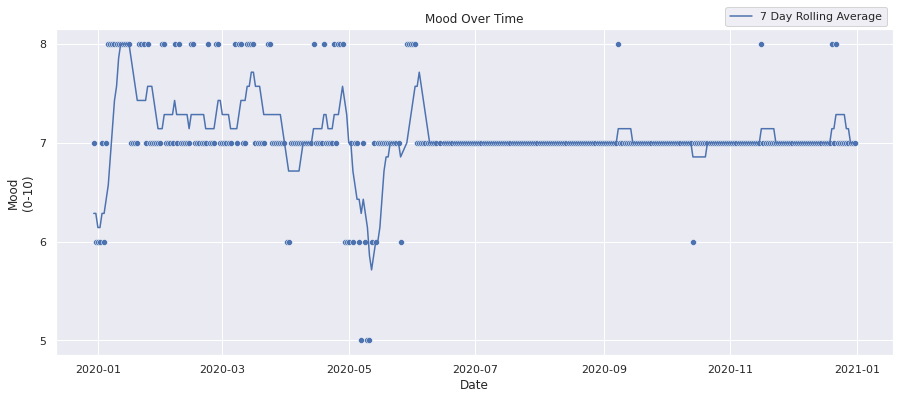

In [226]:
x = mood_df.Date
y = mood_df['Mood']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(0-10)'
yticks = np.arange(0, 11, 1)
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01) 

#need to find way to anchor legend_location to the chart so it is in line with the right side

title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()
figsize = (15, 6)

plt.figure(figsize=figsize)
plt.title(title)
plt.xlabel(x.name)
plt.ylabel(y_label)
plt.yticks(yticks)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

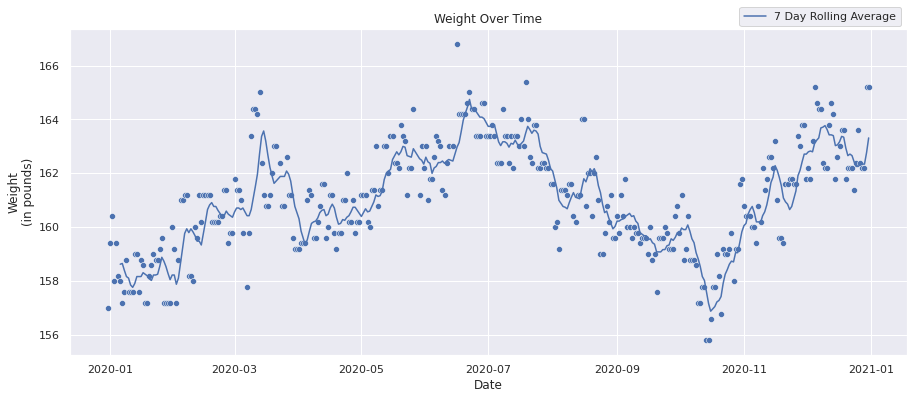

In [210]:
x = mood_df.Date
y = mood_df['Weight']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(in pounds)'
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()
figsize = (15, 6)

plt.figure(figsize=figsize)
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

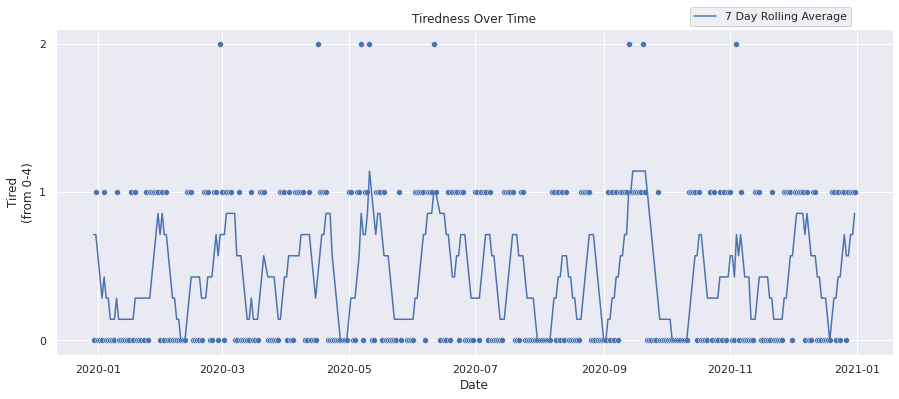

In [211]:
x = mood_df.Date
y = mood_df['Tired']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
yticks = np.arange(0, 5, 1)
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name}ness Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.yticks(yticks)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

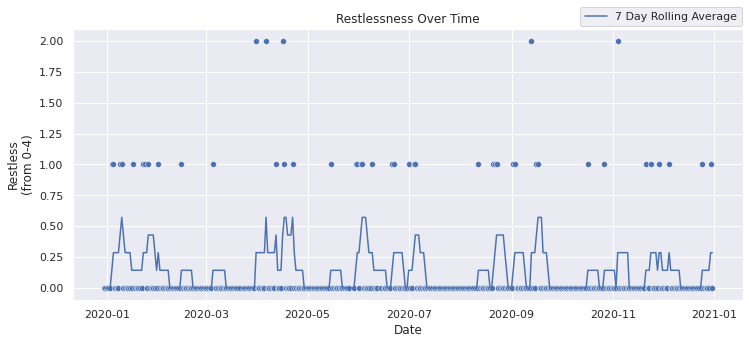

In [212]:
x = mood_df.Date
y = mood_df['Restless']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name}ness Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

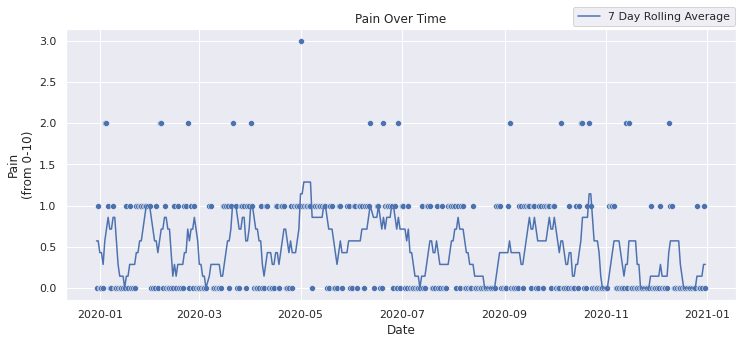

In [213]:
x = mood_df.Date
y = mood_df['Pain']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-10)'
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.yticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

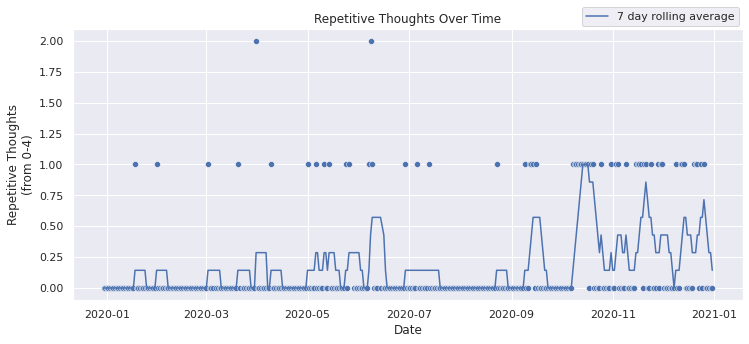

In [214]:
x = mood_df.Date
y = mood_df['Repetitive Thoughts']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} day rolling average'
legend_location = (0.8, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

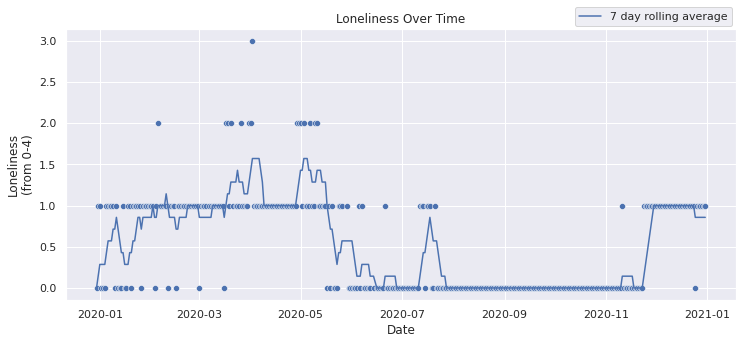

In [215]:
x = mood_df.Date
y = mood_df['Loneliness']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} day rolling average'
legend_location = (0.8, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

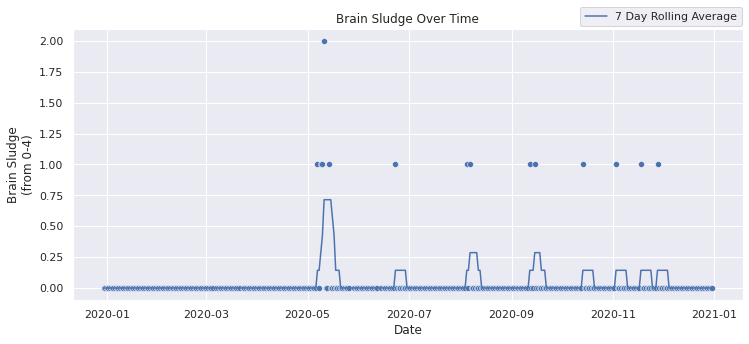

In [216]:
x = mood_df.Date
y = mood_df['Brain Sludge']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

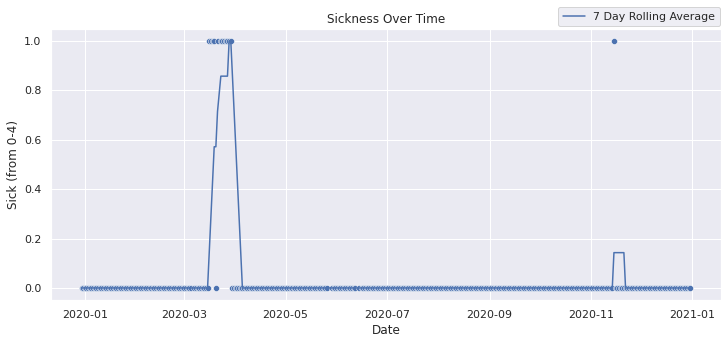

In [217]:
x = mood_df.Date
y = mood_df['Sick']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} Day Rolling Average'
legend_location = (0.8, 1.01)
title = f"{y.name}ness Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc= legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

In [59]:
np.count_nonzero(mood_df['Sick'][11:])

13

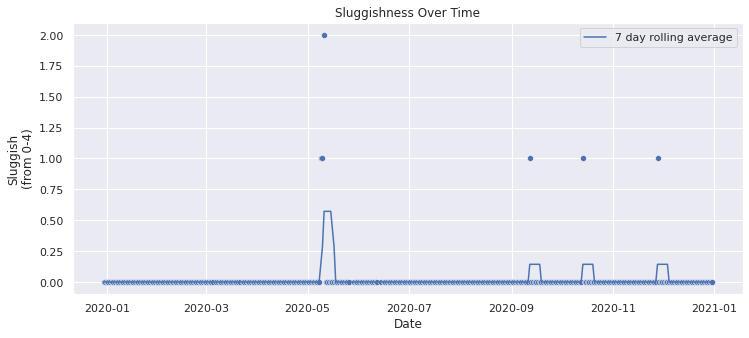

In [218]:
x = mood_df.Date
y = mood_df['Sluggish']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} day rolling average'
title = f"{y.name}ness Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend]);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

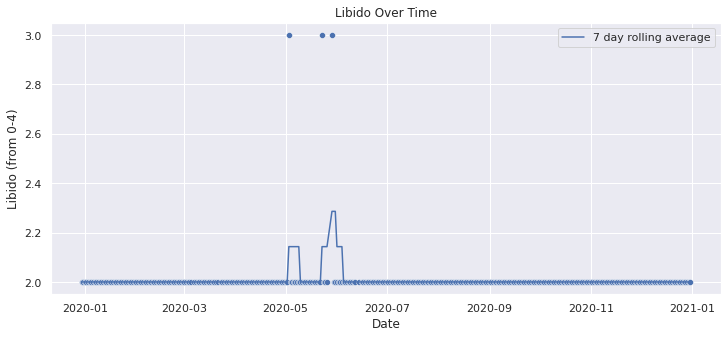

In [42]:
x = mood_df.Date
y = mood_df['Libido']
rolling = 7
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(from 0-4)'
legend = f'{rolling} day rolling average'
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(15, 6))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend]);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

#plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

**RELATIONSHIP/LINE CHART**

In [248]:
#sns.reset_orig()
sns.set_style("white")

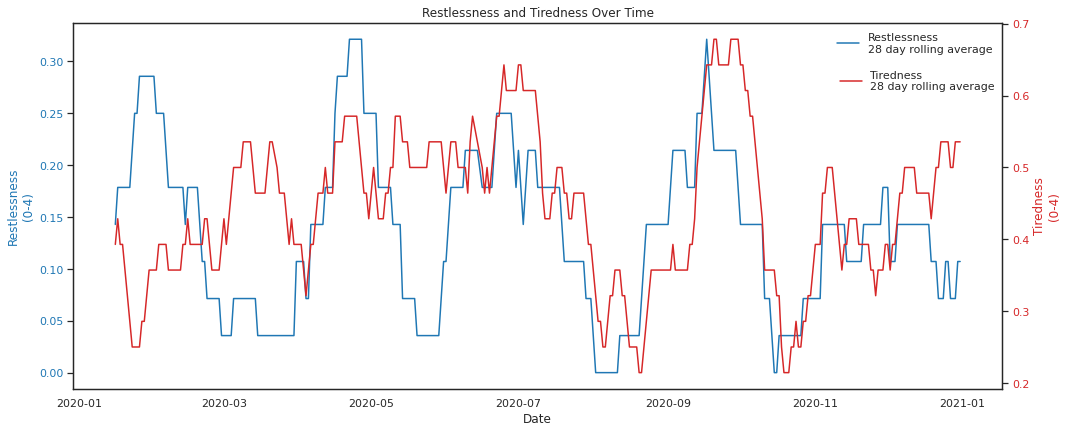

In [257]:
t = mood_df['Date']
rolling = 28
data1 = mood_df['Restless'].rolling(rolling).mean()
data2 = mood_df['Tired'].rolling(rolling).mean()
title = f"{data1.name}ness and {data2.name}ness Over Time"
legend1 = f'{data1.name}ness\n{rolling} day rolling average'
legend2 = f'{data2.name}ness\n{rolling} day rolling average'
legend1_loc = 1
legend2_loc = (.82, .8)
color1 = 'tab:blue'
color2 = 'tab:red'
figsize = (15, 6)
y_label1 = f"{data1.name}ness\n(0-4)"
y_label2 = f"{data2.name}ness\n(0-4)"

fig, ax1 = plt.subplots(figsize=figsize)

ax1.set_xlabel(t.name)
ax1.set_ylabel(y_label1, color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel(y_label2, color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(title)

#plt.legend([legend]);
ax1.legend([legend1], loc = legend1_loc, frameon = False);
ax2.legend([legend2], loc = legend2_loc, frameon = False);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

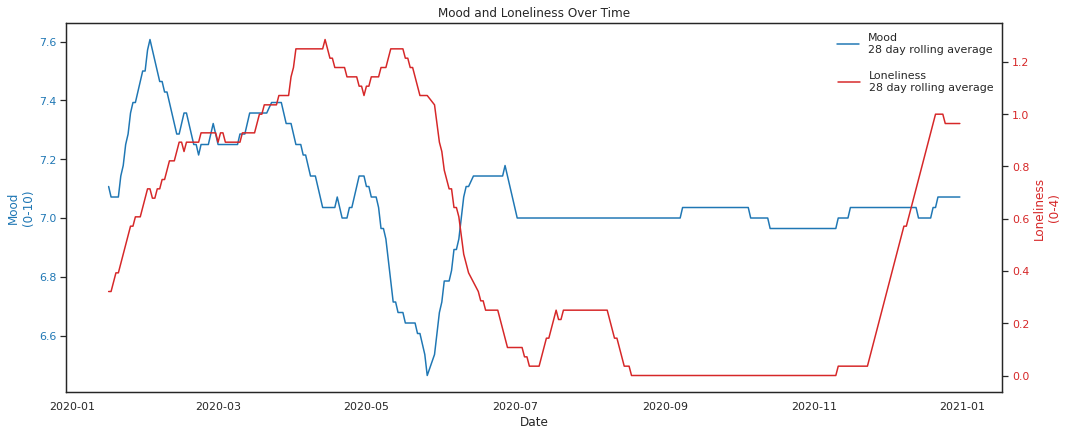

In [258]:
t = mood_df['Date']
rolling = 28
data1 = mood_df['Mood'].rolling(rolling).mean()
data2 = mood_df['Loneliness'].rolling(rolling).mean()
title = f"{data1.name} and {data2.name} Over Time"
legend1 = f'{data1.name}\n{rolling} day rolling average'
legend2 = f'{data2.name}\n{rolling} day rolling average'
legend1_loc = 1
legend2_loc = (.82, .8)
color1 = 'tab:blue'
color2 = 'tab:red'
figsize = (15, 6)
y_label1 = f"{data1.name}\n(0-10)"
y_label2 = f"{data2.name}\n(0-4)"

fig, ax1 = plt.subplots(figsize=figsize)

ax1.set_xlabel(t.name)
ax1.set_ylabel(y_label1, color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel(y_label2, color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(title)

#plt.legend([legend]);
ax1.legend([legend1], loc = legend1_loc, frameon = False);
ax2.legend([legend2], loc = legend2_loc, frameon = False);
#https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend/47370214#47370214

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

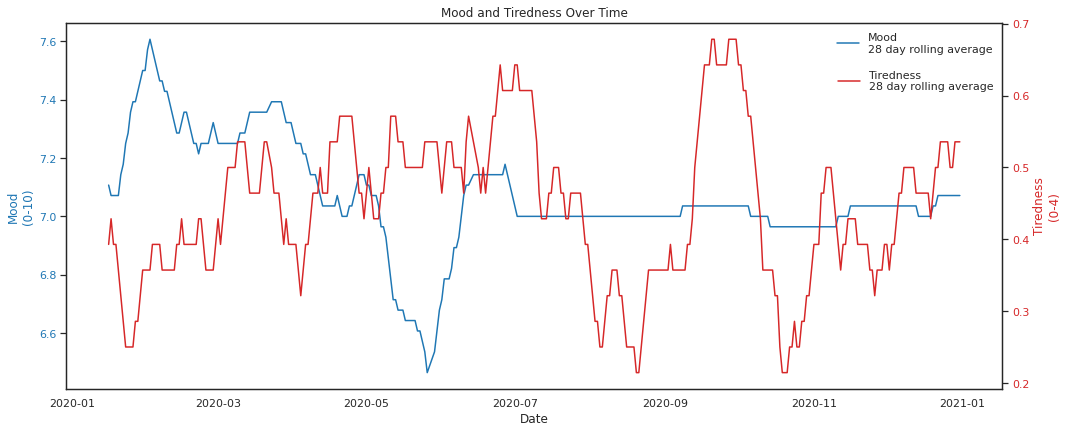

In [259]:
t = mood_df['Date']
rolling = 28
data1 = mood_df['Mood'].rolling(rolling).mean()
data2 = mood_df['Tired'].rolling(rolling).mean()
title = f"{data1.name} and {data2.name}ness Over Time"
legend1 = f'{data1.name}\n{rolling} day rolling average'
legend2 = f'{data2.name}ness\n{rolling} day rolling average'
legend1_loc = 1
legend2_loc = (.82, .8)
color1 = 'tab:blue'
color2 = 'tab:red'
figsize = (15, 6)
y_label1 = f"{data1.name}\n(0-10)"
y_label2 = f"{data2.name}ness\n(0-4)"

fig, ax1 = plt.subplots(figsize=figsize)

ax1.set_xlabel(t.name)
ax1.set_ylabel(y_label1, color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel(y_label2, color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(title)

#plt.legend([legend]);
ax1.legend([legend1], loc = legend1_loc, frameon = False);
ax2.legend([legend2], loc = legend2_loc, frameon = False);
#https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend/47370214#47370214

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

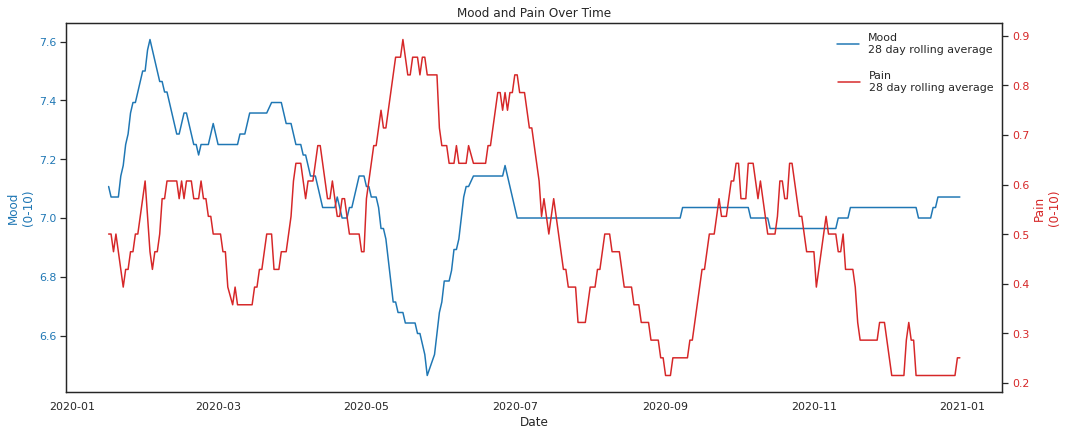

In [260]:
t = mood_df['Date']
rolling = 28
data1 = mood_df['Mood'].rolling(rolling).mean()
data2 = mood_df['Pain'].rolling(rolling).mean()
title = f"{data1.name} and {data2.name} Over Time"
legend1 = f'{data1.name}\n{rolling} day rolling average'
legend2 = f'{data2.name}\n{rolling} day rolling average'
legend1_loc = 1
legend2_loc = (.82, .8)
color1 = 'tab:blue'
color2 = 'tab:red'
figsize = (15, 6)
y_label1 = f"{data1.name}\n(0-10)"
y_label2 = f"{data2.name}\n(0-10)"

fig, ax1 = plt.subplots(figsize=figsize)

ax1.set_xlabel(t.name)
ax1.set_ylabel(y_label1, color=color1)
ax1.plot(t, data1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axis that shares the same x-axis

ax2.set_ylabel(y_label2, color=color2)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title(title)

#plt.legend([legend]);
ax1.legend([legend1], loc = legend1_loc, frameon = False);
ax2.legend([legend2], loc = legend2_loc, frameon = False);
#https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend/47370214#47370214

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

**HISTOGRAMS**

In [61]:
sns.set()

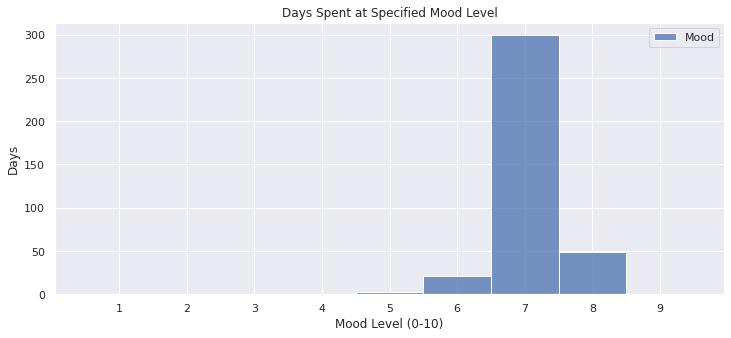

In [108]:
data = mood_df['Mood']
data_range = '(0-10)'
bins = np.arange(0, 10, 1) + .5
xlabel = 'Days'
ylabel = f"{data.name} Level {data_range}"
xticks = bins + .5
yticks = None
title = f"Days Spent at Specified {data.name} Level"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.xticks(xticks)
plt.yticks(yticks)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

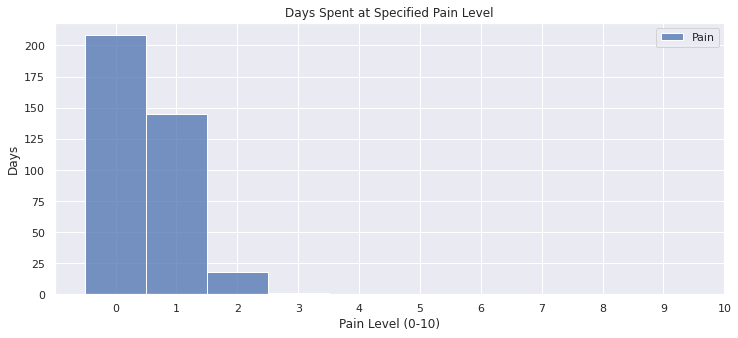

In [111]:
data = mood_df['Pain']
data_range = '(0-10)'
bins = np.arange(-1, 10, 1) + .5
xlabel = 'Days'
ylabel = f"{data.name} Level {data_range}"
xticks = bins + .5
yticks = None
title = f"Days Spent at Specified {data.name} Level"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
plt.xticks(xticks)
plt.yticks(yticks)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

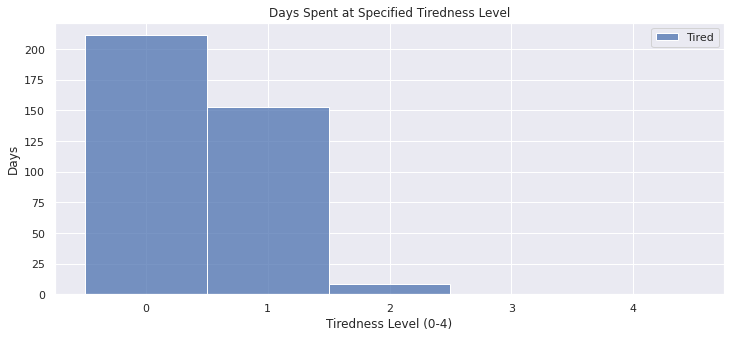

In [64]:
data = mood_df['Tired']
data_range = '(0-4)'
bins = np.arange(-1, 5, 1) +.5
xlabel = 'Days'
ylabel = f"{data.name}ness Level {data_range}"
xticks = None
yticks = None
title = f"Days Spent at Specified {data.name}ness Level"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
plt.xticks(xticks)
plt.yticks(yticks)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

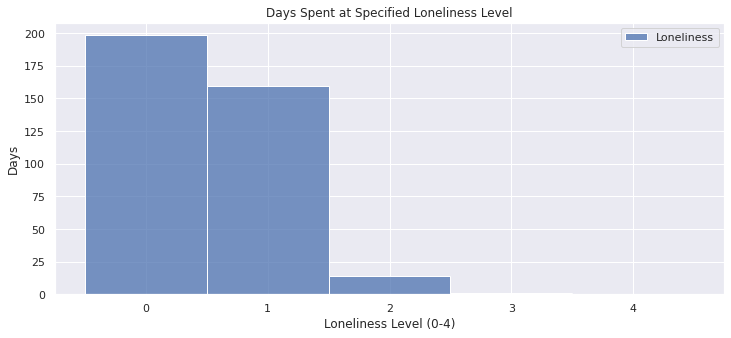

In [65]:
data = mood_df['Loneliness']
data_range = '(0-4)'
bins = np.arange(-1, 5, 1) + .5
xlabel = 'Days'
ylabel = f"{data.name} Level {data_range}"
xticks = None
yticks = None
title = f"Days Spent at Specified {data.name} Level"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
plt.xticks(xticks)
plt.yticks(yticks)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

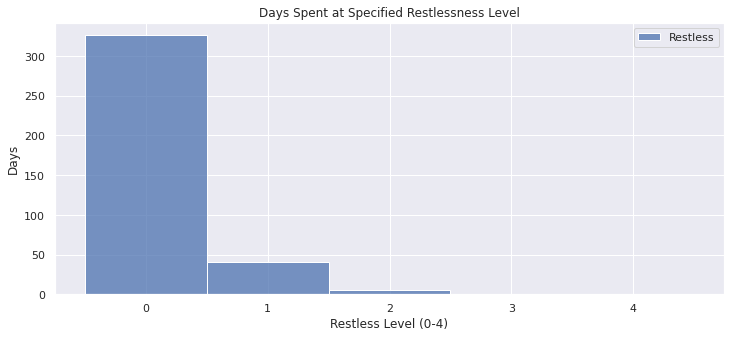

In [66]:
data = mood_df['Restless']
data_range = '(0-4)'
bins = np.arange(-1, 5, 1) + .5
xlabel = 'Days'
ylabel = f"{data.name} Level {data_range}"
xticks = None
yticks = None
title = f"Days Spent at Specified {data.name}ness Level"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
plt.xticks(xticks)
plt.yticks(yticks)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

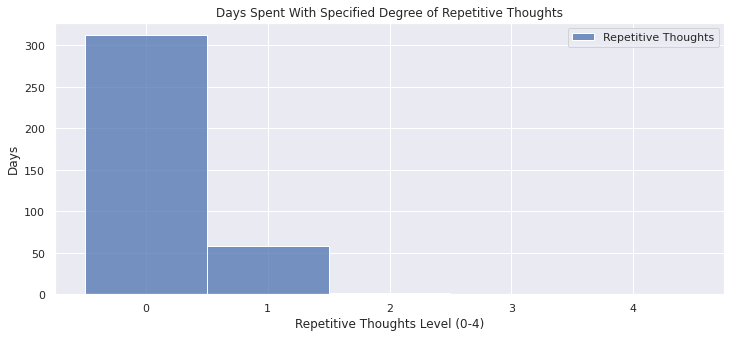

In [67]:
data = mood_df['Repetitive Thoughts']
data_range = '(0-4)'
bins = np.arange(-1, 5, 1) + .5
xlabel = 'Days'
ylabel = f"{data.name} Level {data_range}"
xticks = None
yticks = None
title = f"Days Spent With Specified Degree of {data.name}"
legend = f"{data.name}"
legend_location = 'best'
figsize = (12, 5)

plt.figure(figsize=figsize)
plt.title(title)
plt.ylabel(xlabel)
plt.xlabel(ylabel)
plt.xticks(xticks)
plt.yticks(yticks)
sns.histplot(data, bins=bins);
plt.legend([legend], loc=legend_location);

**REPRESENTING BINARY DATA**

In [263]:
sns.set()

In [68]:
# statsmodels.nonparametric.smoothers_lowess.lowess(endog=mood_df['Shower'], 
#                                                   exog=mood_df['Date'], 
#                                                   frac=0.6666666666666666, 
#                                                   it=3, 
#                                                   delta=0.0, 
#                                                   xvals=None, 
#                                                   is_sorted=False, 
#                                                   missing='drop', 
#                                                   return_sorted=True)

# # ANOTHER WAY TO VISUALIZE BINARY DATA I.E. DAYS YOU SHOWERED OR NOT
# #https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
# #https://stats.stackexchange.com/questions/45444/how-do-you-visualize-binary-outcomes-versus-a-continuous-predictor

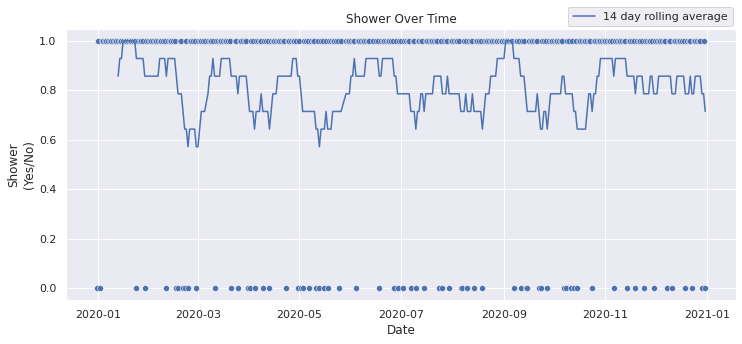

In [264]:
x = mood_df.Date
y = mood_df['Shower']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

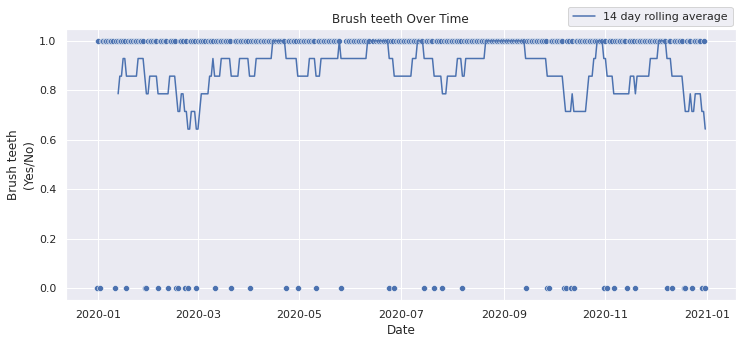

In [265]:
x = mood_df.Date
y = mood_df['Brush teeth']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);

# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

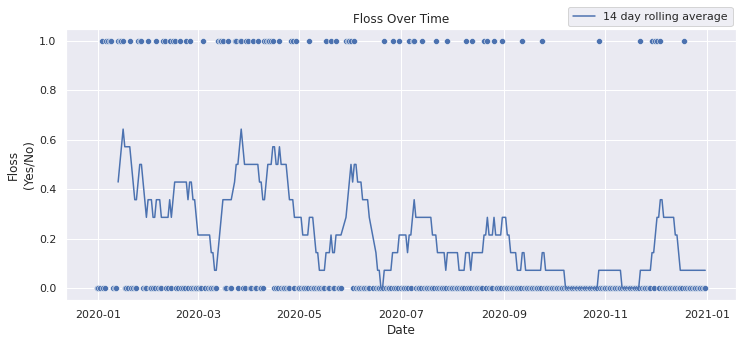

In [266]:
x = mood_df.Date
y = mood_df['Floss']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

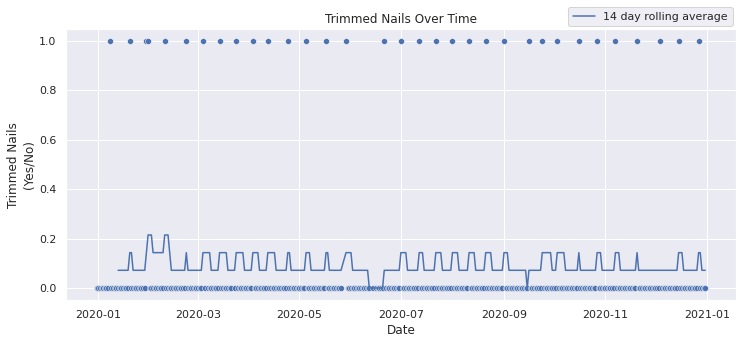

In [267]:
x = mood_df.Date
y = mood_df['Trimmed Nails']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

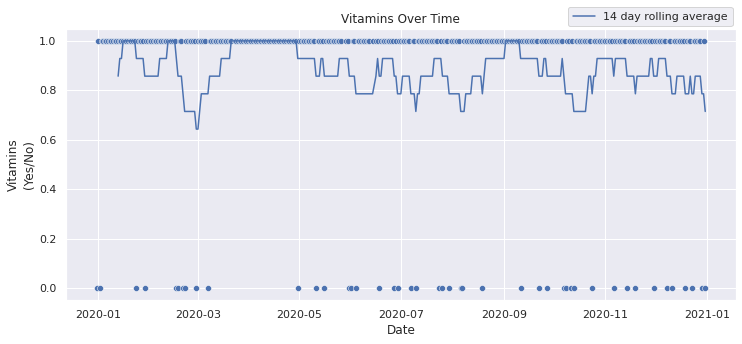

In [268]:
x = mood_df.Date
y = mood_df['Vitamins']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

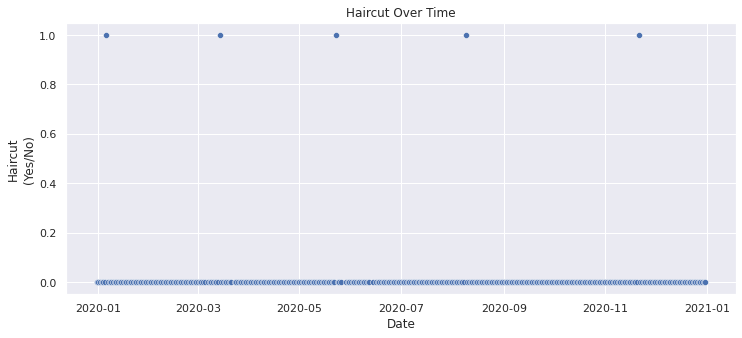

In [79]:
x = mood_df.Date
y = mood_df['Haircut']
rolling = 14
y_rolling = y.rolling(rolling).mean()
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Yes/No)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
#plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
#plt.legend([legend], loc=legend_location);

In [76]:
np.count_nonzero(mood_df['Haircut'][11:])
# it'll count NaN values too without that [11:] addition
# need to find way to ignore NaN's automatically instead of chopping them off manually.

5

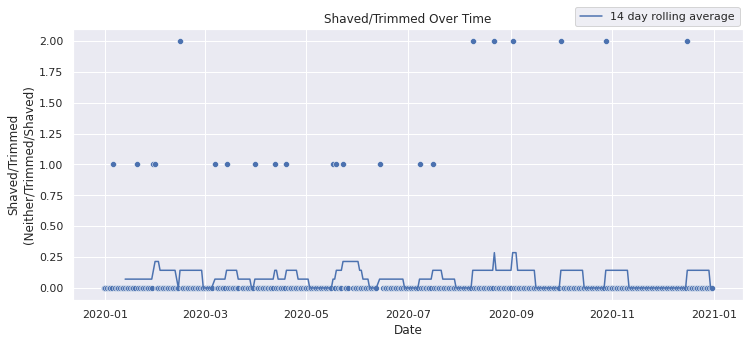

In [269]:
x = mood_df.Date
y = mood_df['Shaved/Trimmed']
rolling = 14
rolling_label = f'{rolling} day rolling average'
y_label = f'{y.name}\n(Neither/Trimmed/Shaved)'
legend = f'{rolling} day rolling average'
legend_location = (.75, 1.01)
title = f"{y.name} Over Time"
y_rolling = y.rolling(rolling).mean()

plt.figure(figsize=(12, 5))
plt.title(title)
plt.xlabel(x.name)
plt.xticks()
plt.ylabel(y_label)
plt.plot(x, y_rolling,label=rolling_label);
sns.scatterplot(x = x, y = y );
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_").replace("/", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [301]:
mood_df_weekday = pd.DataFrame()
mood_df_weekday['Weekday Average Mood'] = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

In [302]:
mood_df_weekday.at[0, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 0][['Mood']].mean()
mood_df_weekday.at[1, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 1][['Mood']].mean()
mood_df_weekday.at[2, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 2][['Mood']].mean()
mood_df_weekday.at[3, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 3][['Mood']].mean()
mood_df_weekday.at[4, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 4][['Mood']].mean()
mood_df_weekday.at[5, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 5][['Mood']].mean()
mood_df_weekday.at[6, 'Weekday Average Mood'] = mood_df[mood_df.Weekday == 6][['Mood']].mean()


In [303]:
mood_df_weekday

,Weekday Average Mood
0,7.115385
1,7.132075
2,6.961538
3,6.961538
4,7.098039
5,7.098039
6,7.137255


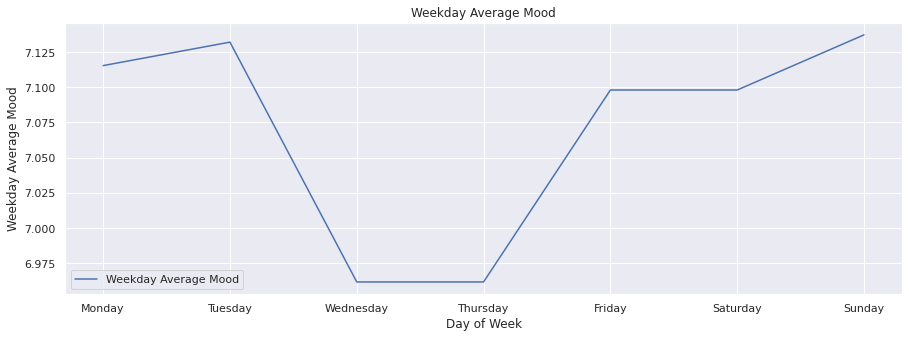

In [304]:
x = [0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = mood_df_weekday['Weekday Average Mood']
y_label = f'{y.name}'
legend = f'{y.name}'
legend_location = 0
title = f'{y.name}'
plt.figure(figsize=(15, 5))
plt.title(title)
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel(y_label)
plt.plot(y);
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_").replace("/", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [305]:
mood_df_weekday['Weekday Average Pain'] = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

In [306]:
mood_df_weekday.at[0, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 0][['Pain']].mean()
mood_df_weekday.at[1, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 1][['Pain']].mean()
mood_df_weekday.at[2, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 2][['Pain']].mean()
mood_df_weekday.at[3, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 3][['Pain']].mean()
mood_df_weekday.at[4, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 4][['Pain']].mean()
mood_df_weekday.at[5, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 5][['Pain']].mean()
mood_df_weekday.at[6, 'Weekday Average Pain'] = mood_df[mood_df.Weekday == 6][['Pain']].mean()
mood_df_weekday

,Weekday Average Mood,Weekday Average Pain
0,7.115385,0.365385
1,7.132075,0.377358
2,6.961538,0.461538
3,6.961538,0.519231
4,7.098039,0.666667
5,7.098039,0.588235
6,7.137255,0.450980


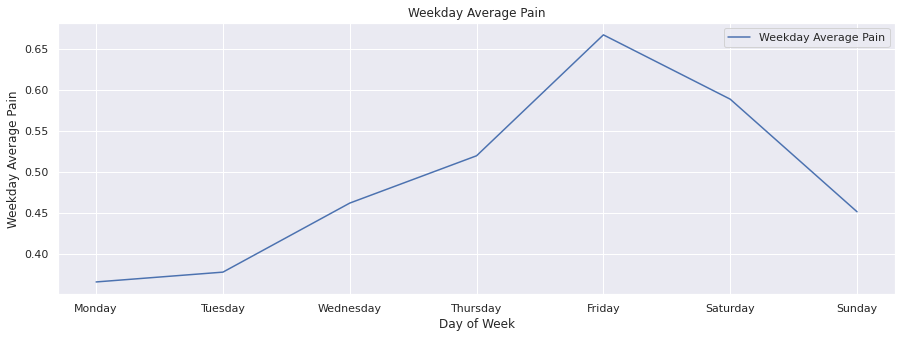

In [307]:
x = [0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = mood_df_weekday['Weekday Average Pain']
y_label = f'{y.name}'
legend = f'{y.name}'
legend_location = 0
title = f'{y.name}'
plt.figure(figsize=(15, 5))
plt.title(title)
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel(y_label)
plt.plot(y);
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_").replace("/", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()

In [308]:
mood_df_weekday['Weekday Average Weight'] = [0.0,1.0,2.0,3.0,4.0,5.0,6.0]

In [309]:
mood_df_weekday.at[0, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 0][['Weight']].mean()
mood_df_weekday.at[1, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 1][['Weight']].mean()
mood_df_weekday.at[2, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 2][['Weight']].mean()
mood_df_weekday.at[3, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 3][['Weight']].mean()
mood_df_weekday.at[4, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 4][['Weight']].mean()
mood_df_weekday.at[5, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 5][['Weight']].mean()
mood_df_weekday.at[6, 'Weekday Average Weight'] = mood_df[mood_df.Weekday == 6][['Weight']].mean()
mood_df_weekday

,Weekday Average Mood,Weekday Average Pain,Weekday Average Weight
0,7.115385,0.365385,161.050980
1,7.132075,0.377358,160.901887
2,6.961538,0.461538,160.900000
3,6.961538,0.519231,161.050000
4,7.098039,0.666667,161.286275
5,7.098039,0.588235,161.090196
6,7.137255,0.450980,160.996078


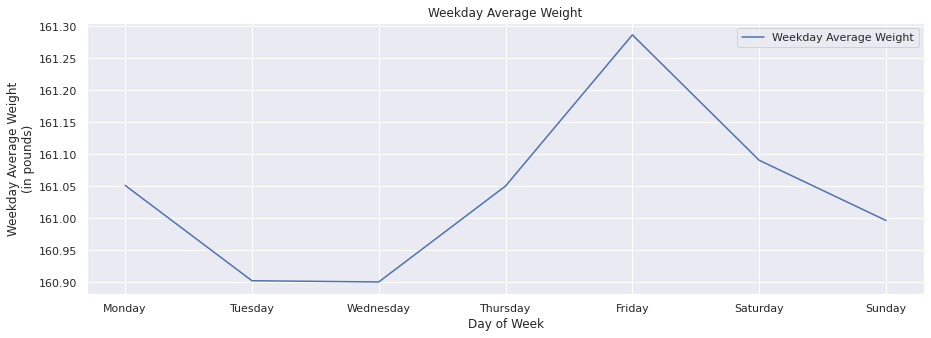

In [311]:
x = [0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = mood_df_weekday['Weekday Average Weight']
y_label = f'{y.name}\n(in pounds)'
legend = f'{y.name}'
legend_location = 0
title = f'{y.name}'
plt.figure(figsize=(15, 5))
plt.title(title)
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2,3,4,5,6,], ['Monday', 'Tuesday', "Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel(y_label)
plt.plot(y);
plt.legend([legend], loc=legend_location);


# how to export the file to become a png, (could make it a pdf or jpg instead)
filename = f"{title}.png".replace(" ", "_").replace("/", "_")
filepath = f'{cwd}/charts/'
filepath = filepath + filename

plt.savefig(filepath, bbox_inches='tight')
#plt.savefig(f"{title}.png".replace(" ", "_"), bbox_inches='tight')

plt.show()